In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_rentals.csv")
print("Dataset loaded with shape:", df.shape)
df.head()


Dataset loaded with shape: (196, 49)


,rentfaster_id,city,province,address,latitude,longitude,price,beds,baths,sq_feet,...,availability_date_Negotiable,availability_date_No Vacancy,availability_date_November 24,availability_date_October 01,availability_date_October 04,availability_date_September 01,smoking_Non-Smoking,smoking_Smoke Free Building,cats_True,dogs_True
0,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,3895.0,2,2.0,820.0,...,False,False,False,False,False,False,True,False,True,True
1,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,2695.0,1,1.0,440.0,...,False,False,False,False,False,False,True,False,True,True
2,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,4395.0,2,2.0,639.0,...,False,False,False,False,False,False,True,False,True,True
3,544095,Vancouver,British Columbia,1770 Pendrell Street,49.287460,-123.140530,3300.0,1,1.0,650.0,...,False,False,False,False,False,False,True,False,True,True
4,559642,Vancouver,British Columbia,1477 Continental Street,49.274461,-123.130948,2450.0,1,1.0,639.0,...,False,False,False,False,False,False,False,False,True,True


In [2]:
# target variable
y = df['price']

# feature variables (exclude price and non-numeric columns)
features = [col for col in df.columns if col not in ['price', 'city', 'province', 'address', 'link']]
X = df[features]

print("Features being used:", features)

Features being used: ['rentfaster_id', 'latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months', 'lease_term_Long Term', 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement', 'type_Condo Unit', 'type_Main Floor', 'type_Townhouse', 'furnishing_Negotiable', 'furnishing_Unfurnished', 'availability_date_August 29', 'availability_date_Call for Availability', 'availability_date_Immediate', 'availability_date_July 01', 'availability_date_July 02', 'availability_date_July 05', 'availability_date_July 06', 'availability_date_July 07', 'availability_date_July 08', 'availability_date_July 15', 'availability_date_July 20', 'availability_date_July 31', 'availability_date_June 15', 'availability_date_June 16', 'availability_date_June 21', 'availability_date_June 29', 'availability_date_June 30', 'availability_date_May 08', 'availability_date_Negotiable', 'availability_date_No Vacancy', 'availability_date_November 24', 'availability_date_October 01', 'availability_date_

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (156, 44) Testing set: (40, 44)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 370.99
RMSE: 483.53
R²: 0.685


Model Evaluation Metrics:
  MAE : 370.99
  RMSE: 483.53
  R²  : 0.685

Top Features Influencing Price:
                                    Feature   Coefficient
8                     lease_term_Negotiable  2.979951e+03
1                                  latitude  2.294666e+03
41              smoking_Smoke Free Building  9.348415e+02
10                            type_Basement  7.714575e+02
4                                     baths  6.195722e+02
3                                      beds  5.023128e+02
21                availability_date_July 05  4.493430e+02
40                      smoking_Non-Smoking  4.275008e+02
20                availability_date_July 02  4.025098e+02
30                availability_date_June 21  3.847683e+02
25                availability_date_July 15  2.927279e+02
24                availability_date_July 08  2.046877e+02
23                availability_date_July 07  1.878168e+02
43                                dogs_True  1.828714e+02
18              availabilit

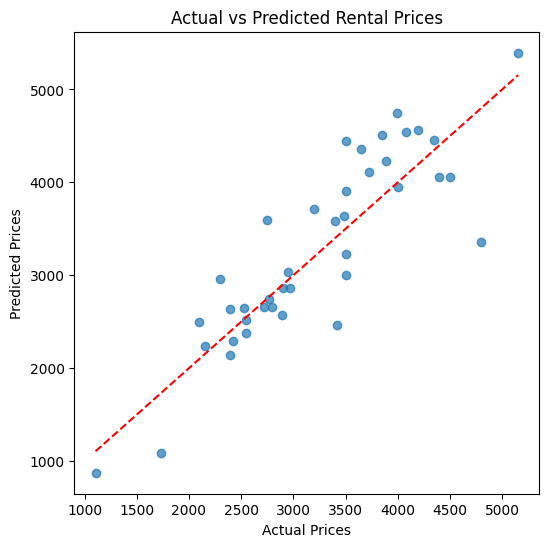

In [6]:
# model summary: coefficients and visualization

print("Model Evaluation Metrics:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")
print()

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Top Features Influencing Price:")
print(coefficients)

# Scatter plot of actual vs predicted with a perfect prediction line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Rental Prices")
plt.show()
